In [152]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt
import warnings
from scipy.stats.stats import pearsonr

In [77]:
original = pd.read_table('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv', delimiter=',')
original

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,061309,2022/07/08,CO,061309,WRAY COMMUNITY DISTRICT HOSPITAL,1017 W 7TH ST,WRAY,80758.0,Critical Access Hospitals,8125.0,...,0.0,0.0,5,0.0,0.0,5,0.0,0.0,5,0.0
1,251309,2022/07/08,MS,251309,FIELD HEALTH SYSTEM,178 HIGHWAY 24,CENTREVILLE,39631.0,Critical Access Hospitals,28157.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
2,351313,2022/07/08,ND,351313,SOUTHWEST HEALTHCARE SERVICES,802 2ND ST NW,BOWMAN,58623.0,Critical Access Hospitals,38011.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
3,430089,2022/07/08,SD,430089,DUNES SURGICAL HOSPITAL,600 N SIOUX POINT ROAD,DAKOTA DUNES,57049.0,Short Term,46127.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
4,110071,2022/07/01,GA,110071,APPLING HOSPITAL,163 E TOLLISON STREET,BAXLEY,31513.0,Short Term,13001.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509835,310011,2020/07/31,NJ,310011,"CAPE REGIONAL MEDICAL CENTER, INC",TWO STONE HARBOR BLVD,CAPE MAY COURT HOUSE,8210.0,Short Term,34009.0,...,NaN,0.0,3,0.0,0.0,3,0.0,0.0,3,0.0
509836,390145,2020/07/31,PA,390145,EXCELA HEALTH WESTMORELAND HOSPITAL,532 WEST PITTSBURGH STREET,GREENSBURG,15601.0,Short Term,42129.0,...,NaN,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
509837,451313,2020/07/31,TX,451313,FISHER COUNTY HOSPITAL DISTRICT,774 STATE HIGHWAY 70 N,ROTAN,79546.0,Critical Access Hospitals,48151.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
509838,501338,2020/07/31,WA,501338,SNOQUALMIE VALLEY HOSPITAL,9801 FRONTIER AVE SE,SNOQUALMIE,98065.0,Critical Access Hospitals,53033.0,...,NaN,0.0,6,0.0,0.0,6,0.0,0.0,6,0.0


In [78]:
list(original)

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_used_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
 'total_p

In [79]:
new = original[["state","zip","hospital_subtype","fips_code","total_beds_7_day_avg","inpatient_beds_used_7_day_avg"]]
new

,state,zip,hospital_subtype,fips_code,total_beds_7_day_avg,inpatient_beds_used_7_day_avg
0,CO,80758.0,Critical Access Hospitals,8125.0,NaN,-999999.0
1,MS,39631.0,Critical Access Hospitals,28157.0,NaN,10.0
2,ND,58623.0,Critical Access Hospitals,38011.0,NaN,29.6
3,SD,57049.0,Short Term,46127.0,NaN,12.0
4,GA,31513.0,Short Term,13001.0,NaN,25.0
...,...,...,...,...,...,...
509835,NJ,8210.0,Short Term,34009.0,125.0,89.2
509836,PA,15601.0,Short Term,42129.0,309.0,177.3
509837,TX,79546.0,Critical Access Hospitals,48151.0,25.7,4.7
509838,WA,98065.0,Critical Access Hospitals,53033.0,49.5,20.5


In [80]:
grouped = new.groupby("hospital_subtype")
grouped.sum()

,zip,fips_code,total_beds_7_day_avg,inpatient_beds_used_7_day_avg
hospital_subtype,,,,
Childrens Hospitals,5.412479e+08,2.906817e+08,-52339478.4,-6.338253e+08
Critical Access Hospitals,8.227108e+09,4.133299e+09,-286950593.1,-3.139488e+10
Long Term,1.893935e+09,1.004048e+09,-61102361.1,-1.855569e+08
Short Term,1.684296e+10,9.551842e+09,-28998673.2,-8.975647e+09


In [81]:
grouped

In [82]:
n = original.groupby(["is_metro_micro","zip"])
n.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,061309,2022/07/08,CO,061309,WRAY COMMUNITY DISTRICT HOSPITAL,1017 W 7TH ST,WRAY,80758.0,Critical Access Hospitals,8125.0,...,0.0,0.0,5,0.0,0.0,5,0.0,0.0,5,0.0
1,251309,2022/07/08,MS,251309,FIELD HEALTH SYSTEM,178 HIGHWAY 24,CENTREVILLE,39631.0,Critical Access Hospitals,28157.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
2,351313,2022/07/08,ND,351313,SOUTHWEST HEALTHCARE SERVICES,802 2ND ST NW,BOWMAN,58623.0,Critical Access Hospitals,38011.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
3,430089,2022/07/08,SD,430089,DUNES SURGICAL HOSPITAL,600 N SIOUX POINT ROAD,DAKOTA DUNES,57049.0,Short Term,46127.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
4,110071,2022/07/01,GA,110071,APPLING HOSPITAL,163 E TOLLISON STREET,BAXLEY,31513.0,Short Term,13001.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502071,370229,2020/08/07,OK,370229,ALLIANCEHEALTH SEMINOLE,2401 WRANGLER BOULEVARD,SEMINOLE,74868.0,Short Term,40133.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
504352,885f4b8c5c7b97f478df46199383ecc3520cc2ee95217a...,2020/07/31,OK,NaN,Tulsa ER & Hospital,717 West 71st St S,Tulsa,74132.0,Short Term,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
506650,370229,2020/08/14,OK,370229,ALLIANCEHEALTH SEMINOLE,2401 WRANGLER BOULEVARD,SEMINOLE,74868.0,Short Term,40133.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
507863,510071,2020/07/31,WV,510071,BLUEFIELD REGIONAL MEDICAL CENTER,500 CHERRY ST,BLUEFIELD,24701.0,Short Term,54055.0,...,NaN,0.0,1,0.0,NaN,0,NaN,NaN,0,NaN


In [102]:
state_beds = pd.read_table("By State - Sheet1 (1).tsv")
state_beds

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.6,0.6,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.3,0.5,1.9
4,Arkansas,0.3,2.2,0.6,3.2
5,California,0.3,1.2,0.3,1.8
6,Colorado,0.4,1.2,0.4,1.9
7,Connecticut,0.0,2.0,0.0,2.0
8,Delaware,0.0,2.1,0.0,2.2
9,District of Columbia,0.0,4.1,0.9,5.1


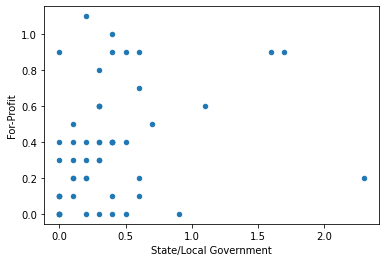

In [109]:
gov_vs_non_profit = state_beds.plot.scatter(x="State/Local Government", y="For-Profit")

In [110]:
#correlation coefficient between state/local hospitals and for-profit hospitals
x = np.array(state_beds["State/Local Government"])
y = np.array(state_beds["For-Profit"])
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.3474271144648665, pvalue=0.011616559840832458)

SpearmanrResult(correlation=-0.42802723884036575, pvalue=0.0015488902428945927)

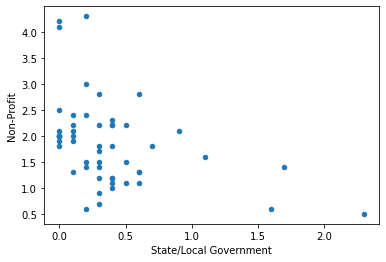

In [112]:
gov_vs_for_profit = state_beds.plot.scatter(x="State/Local Government", y="Non-Profit")
x = np.array(state_beds["State/Local Government"])
y = np.array(state_beds["Non-Profit"])
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.39817283261247993, pvalue=0.0034622475339554774)

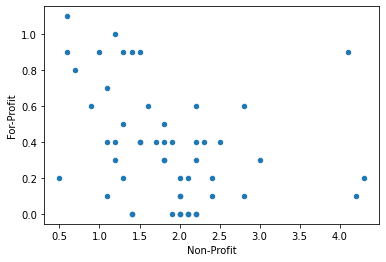

In [114]:
gov_vs_for_profit = state_beds.plot.scatter(x="Non-Profit", y="For-Profit")
x = np.array(state_beds["Non-Profit"])
y = np.array(state_beds["For-Profit"])
scipy.stats.spearmanr(x,y)

In [127]:
qinsured = pd.read_table('Insured or Not by Race - Sheet1.tsv')
qinsured

,Race,Of uninsured group (%),Of insured group (%)
0,White alone,70.5,92.4
1,Black or African American alone,12.4,90.0
2,American Indian and Alaska Native alone,0.8,81.0
3,Asian alone,5.7,93.6
4,Native Hawaiian and Other Pacific Islander alone,0.2,89.2
5,Some other race alone,5.2,80.2
6,Two or more races,5.2,82.3
7,Hispanic or Latino (of any race),18.2,82.3
8,"White alone, not Hispanic or Latino",60.2,94.1


<AxesSubplot:xlabel='Of uninsured group (%)', ylabel='Of insured group (%)'>

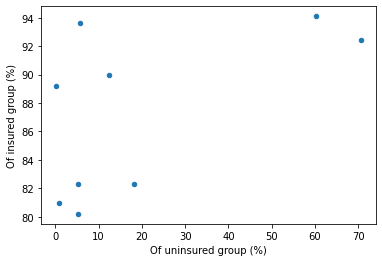

In [148]:
qinsured.plot.scatter("Of uninsured group (%)","Of insured group (%)")
#Null Hypothesis: Of the insured group, a race with a higher percentage of insured individuals have a lower percentage of uninsured individuals.
#Alternative Hypothesis: A race with a high percent of insured does not have a low percent of uninsured percentage.


In [151]:

x = qinsured["Of uninsured group (%)"]
y = qinsured["Of insured group (%)"]
pearsonr(x,y)

(0.5684653660944566, 0.11024670102186315)

In [146]:
qinsured[["Race", "Of insured group (%)"]].

,Race,Of insured group (%)
0,White alone,92.4
1,Black or African American alone,90.0
2,American Indian and Alaska Native alone,81.0
3,Asian alone,93.6
4,Native Hawaiian and Other Pacific Islander alone,89.2
5,Some other race alone,80.2
6,Two or more races,82.3
7,Hispanic or Latino (of any race),82.3
8,"White alone, not Hispanic or Latino",94.1
